# Exploratory Data Analysis Example

## The New York City (NYC) AirBnB Dataset

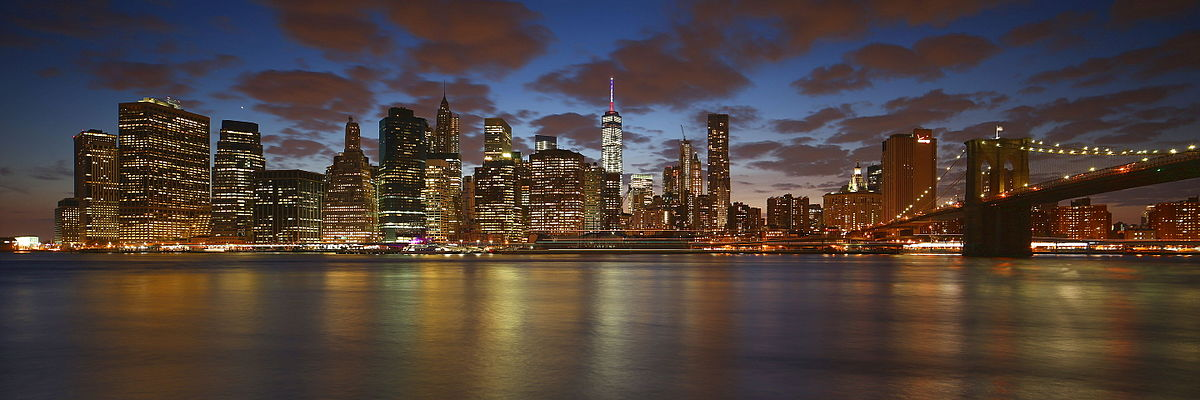

## Task

The ISDL Property Management LC plans to let some of their accommodations in New York City (NYC) via AirBnB. To find out what accommodations can generate the highest rent, they crawled the AirBnB data of NYC.
As a junior data scientist, you have been asked to apply your new knowledge about exploratory data analysis and hypothesis testing to figure out what accommodations have the highest rent.

In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" #display all output not only the last


import numpy as np
import pandas as pd

nyc_data = pd.read_csv("data/AirBnB_Data_NYC.csv")
nyc_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           48895 non-null  int64  
 1   id                   48895 non-null  int64  
 2   name                 48879 non-null  object 
 3   host_id              48895 non-null  int64  
 4   host_name            48874 non-null  object 
 5   neighbourhood_group  48895 non-null  object 
 6   neighbourhood        48895 non-null  object 
 7   latitude             48895 non-null  float64
 8   longitude            48895 non-null  float64
 9   room_type            48895 non-null  object 
 10  price                48895 non-null  int64  
 11  minimum_nights       48895 non-null  int64  
 12  number_of_reviews    48895 non-null  int64  
 13  reviews_per_month    38843 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


## Data Overview

First, we look at the general structure of the dataset and the characteristics of the attributes.

Number of attributes in the dataset: 13  <br>
Number of observations in the dataset: 48895 <br>


In [27]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           48895 non-null  int64  
 1   id                   48895 non-null  int64  
 2   name                 48879 non-null  object 
 3   host_id              48895 non-null  int64  
 4   host_name            48874 non-null  object 
 5   neighbourhood_group  48895 non-null  object 
 6   neighbourhood        48895 non-null  object 
 7   latitude             48895 non-null  float64
 8   longitude            48895 non-null  float64
 9   room_type            48895 non-null  object 
 10  price                48895 non-null  int64  
 11  minimum_nights       48895 non-null  int64  
 12  number_of_reviews    48895 non-null  int64  
 13  reviews_per_month    38843 non-null  float64
dtypes: float64(3), int64(6), object(5)
memory usage: 5.2+ MB


## Data Cleaning

Before analyzing the data, we need to prepare the data for further processing. It is a good practice to check for missing values or invalid values in the dataset.

#### Screen all olumns for NaN or missing values

In [28]:
nyc_data.isnull().sum()

Unnamed: 0                 0
id                         0
name                      16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
number_of_reviews          0
reviews_per_month      10052
dtype: int64

Let's first look at reviews_per_month which contain the most missing values <br>
Let's analyze whether reviews_per_month is always missing if number of reviews is 0.

In [48]:
data1 = nyc_data['number_of_reviews']==0

In [49]:
data2 = nyc_data['reviews_per_month'].isnull()

In [51]:
data1.equals(data2)

True

The data seems valid.

#### Search for empty strings

Lets consider the column 'name'

In [52]:
nyc_data["name"].isnull().sum()
#Show the data where 'name' is null
nyc_data[nyc_data["name"].isnull()]

16

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
2854,2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,NaN
3703,3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,0.45
5775,5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,0.02
5975,5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,0.09
6269,6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,NaN
6567,6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,NaN
6605,6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,NaN
8841,8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,NaN
11963,11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,0.02
12824,12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,NaN


There are 16 observations without a name. This seems strange, as accommodations normally have names, thus we delete this data


In [53]:
# Delete all observations where the name is empty

# Get the index of all rows that should be deleted
emptyNameIndexes = nyc_data[nyc_data.name.isnull()].index

nyc_data.drop(emptyNameIndexes, inplace=True)

# Check whether data is delete
nyc_data["name"].isnull().sum()


0

Lets consider the column 'host_name'

In [54]:
# Search for empty strings in hostname
nyc_data["host_name"].isnull().sum()
nyc_data[nyc_data["host_name"].isnull()]

21

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
360,360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,0.45
2700,2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,0.69
5745,5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,1.00
6075,6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,NaN
6582,6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,0.02
8163,8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,3.59
8257,8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,0.02
8852,8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,3.18
9138,9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,NaN
9817,9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,0.02


There are 21 observations with empty strings. This seems strange, because every host should have a name, thus we delete these observations.

In [55]:
# Get the index of all rows that should be deleted
emtyHostNameIndex = nyc_data[nyc_data.host_name.isnull()].index

# Delete data
nyc_data.drop(emtyHostNameIndex, inplace=True)

# Check whether data is delete
nyc_data["host_name"].isnull().sum()


0

#### Check for unrealistic prices

Check whether there are accommodations which are listed with a price of 0$

In [58]:
nyc_data.loc[nyc_data["price"]==0,"price"].count()

11

There are 11 observations where the price is $0. This appears suspect, because nobody gives away the accommodation for free, thus we remove the observations.

In [59]:
#Get index of the observations with price equal 0
priceZeroIndex = nyc_data[nyc_data["price"] ==0].index
# Delete data
nyc_data.drop(priceZeroIndex, inplace=True)

# Check whether data is delete
nyc_data.loc[nyc_data["price"]==0,"price"].count()


0

Check for unrealistically high prices

In [60]:
nyc_data["price"].mean()
nyc_data.price.median()

nyc_data.nlargest(50,"price")


152.77470469015498

106.0

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month
9151,9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,0.04
17692,17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,0.16
29238,29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN
6530,6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,0.02
12342,12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,0.14
40433,40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN
30268,30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,0.18
4377,4377,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,0.03
29662,29662,22779726,East 72nd Townhouse by (Hidden by Airbnb),156158778,Sally,Manhattan,Upper East Side,40.76824,-73.95989,Entire home/apt,7703,1,0,NaN
42523,42523,33007610,70' Luxury MotorYacht on the Hudson,7407743,Jack,Manhattan,Battery Park City,40.71162,-74.01693,Entire home/apt,7500,1,0,NaN


There are various appartments that appear to have unrealistic prices.
A quick search in AirBnB shows that prices above 4500 dollar rarely exist or not to be taken seriously.
To increase the quality of our data set, we delete all accomondations with prices above 4500 dollar.


In [62]:
#Get index of the observations with outlier prices
priceOutlierIndex = nyc_data[nyc_data["price"] > 4500].index
# Delete data
nyc_dataCleaned = nyc_data.drop(priceOutlierIndex)

nyc_dataCleaned.loc[nyc_dataCleaned["price"] > 4500, "price"].count()




0

## Visualization of the data

Let’s visualize the distribution of the accommodations among the five neighbourhood groups.

<Figure size 900x450 with 0 Axes>

Text(0.5, 1.0, 'Distribution of accommodations among neighbourhood groups')

Text(0.5, 0, 'neighbourhood group')

Text(0, 0.5, 'Number of accommodations')

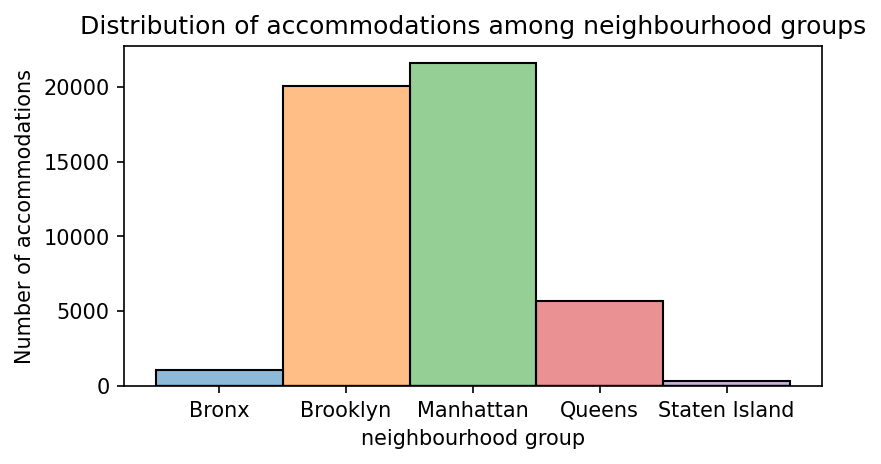

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# convert neighbourhood_group to categorical to ensure it is displayed alphabetically
nyc_dataCleaned['neighbourhood_group'] = pd.Categorical(nyc_dataCleaned['neighbourhood_group'], ["Bronx", "Brooklyn","Manhattan","Queens","Staten Island"])

plt.figure(figsize=(6,3), dpi = 150)
ax = sns.histplot(data=nyc_dataCleaned, x="neighbourhood_group",  hue = "neighbourhood_group", legend = False)
ax.set_title("Distribution of accommodations among neighbourhood groups")
ax.set_xlabel("neighbourhood group")
ax.set_ylabel("Number of accommodations")

Brooklyn and Manhattan have the most accommodations.

#### Let’s visualize the price of the accommodations for each neighbourhood group

<Figure size 1800x900 with 0 Axes>

Text(0.5, 1.0, 'Distribution of price among different neighbourhood groups')

Text(0.5, 0, 'neighbourhood group')

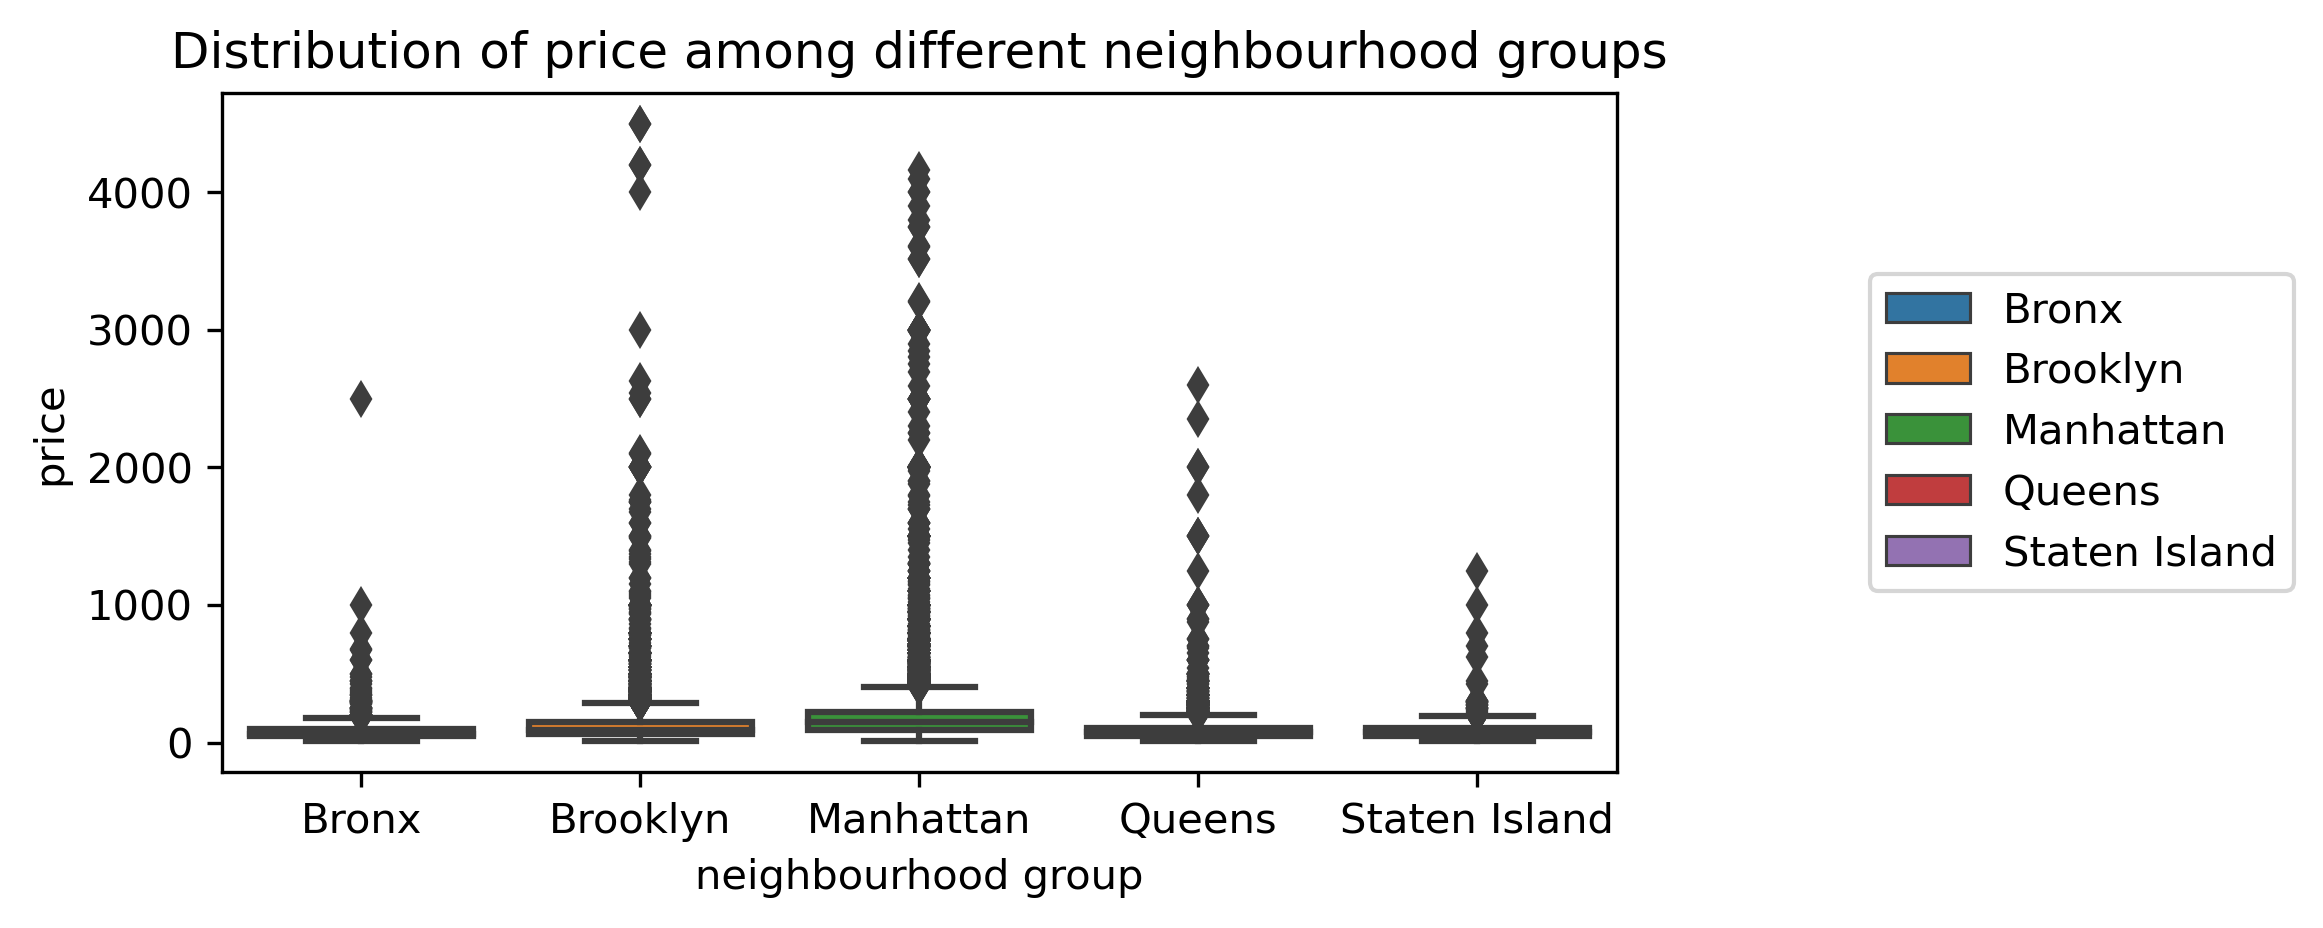

In [66]:
plt.figure(figsize=(6,3), dpi = 300)

ax2 = sns.boxplot(data=nyc_dataCleaned, x="neighbourhood_group", y= "price", hue = "neighbourhood_group", dodge=False)
ax2.set_title("Distribution of price among different neighbourhood groups")
ax2.set_xlabel("neighbourhood group")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

<Figure size 1800x900 with 0 Axes>

[(0.0, 500.0)]

Text(0.5, 1.0, 'Distribution of price among different neighbourhood groups')

Text(0.5, 0, 'neighbourhood group')

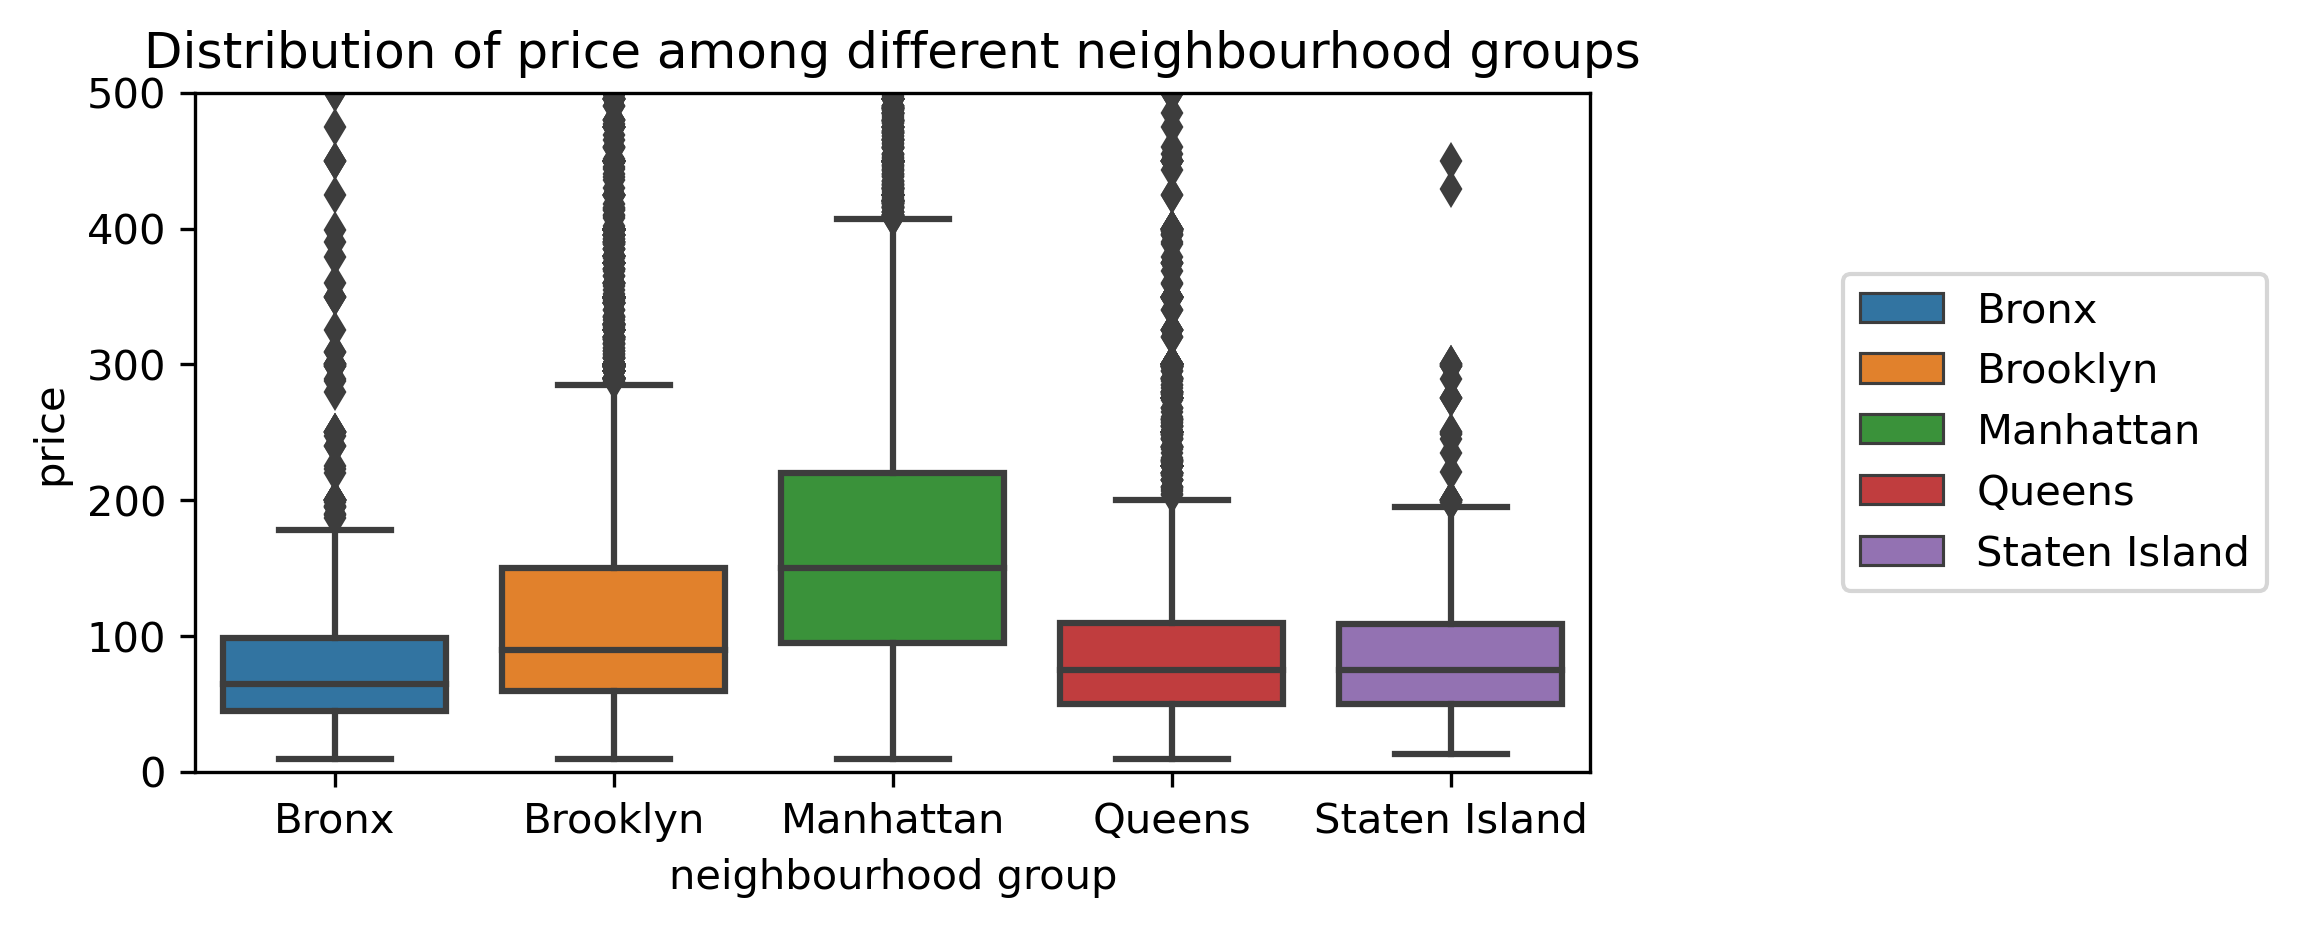

In [67]:
plt.figure(figsize=(6,3), dpi = 300)

ax2 = sns.boxplot(data=nyc_dataCleaned, x="neighbourhood_group", y= "price", hue = "neighbourhood_group", dodge=False)
ax2.set(ylim=(0,500)) # zoom in to get better understanding of the data
ax2.set_title("Distribution of price among different neighbourhood groups")
ax2.set_xlabel("neighbourhood group")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

We see that the prices are quite different for each neighborhood group. Manhattan seems to be the most expensive. <br>
We can visualize the distribution of the prices on a map, by using the longitude and latitude data.


#### Display the neighbourhood groups

<Figure size 1800x1500 with 0 Axes>

Text(0.5, 1.0, 'Neighbourhood groups in NYC')

Text(0.5, 0, 'longitude')

Text(0, 0.5, 'latitude')

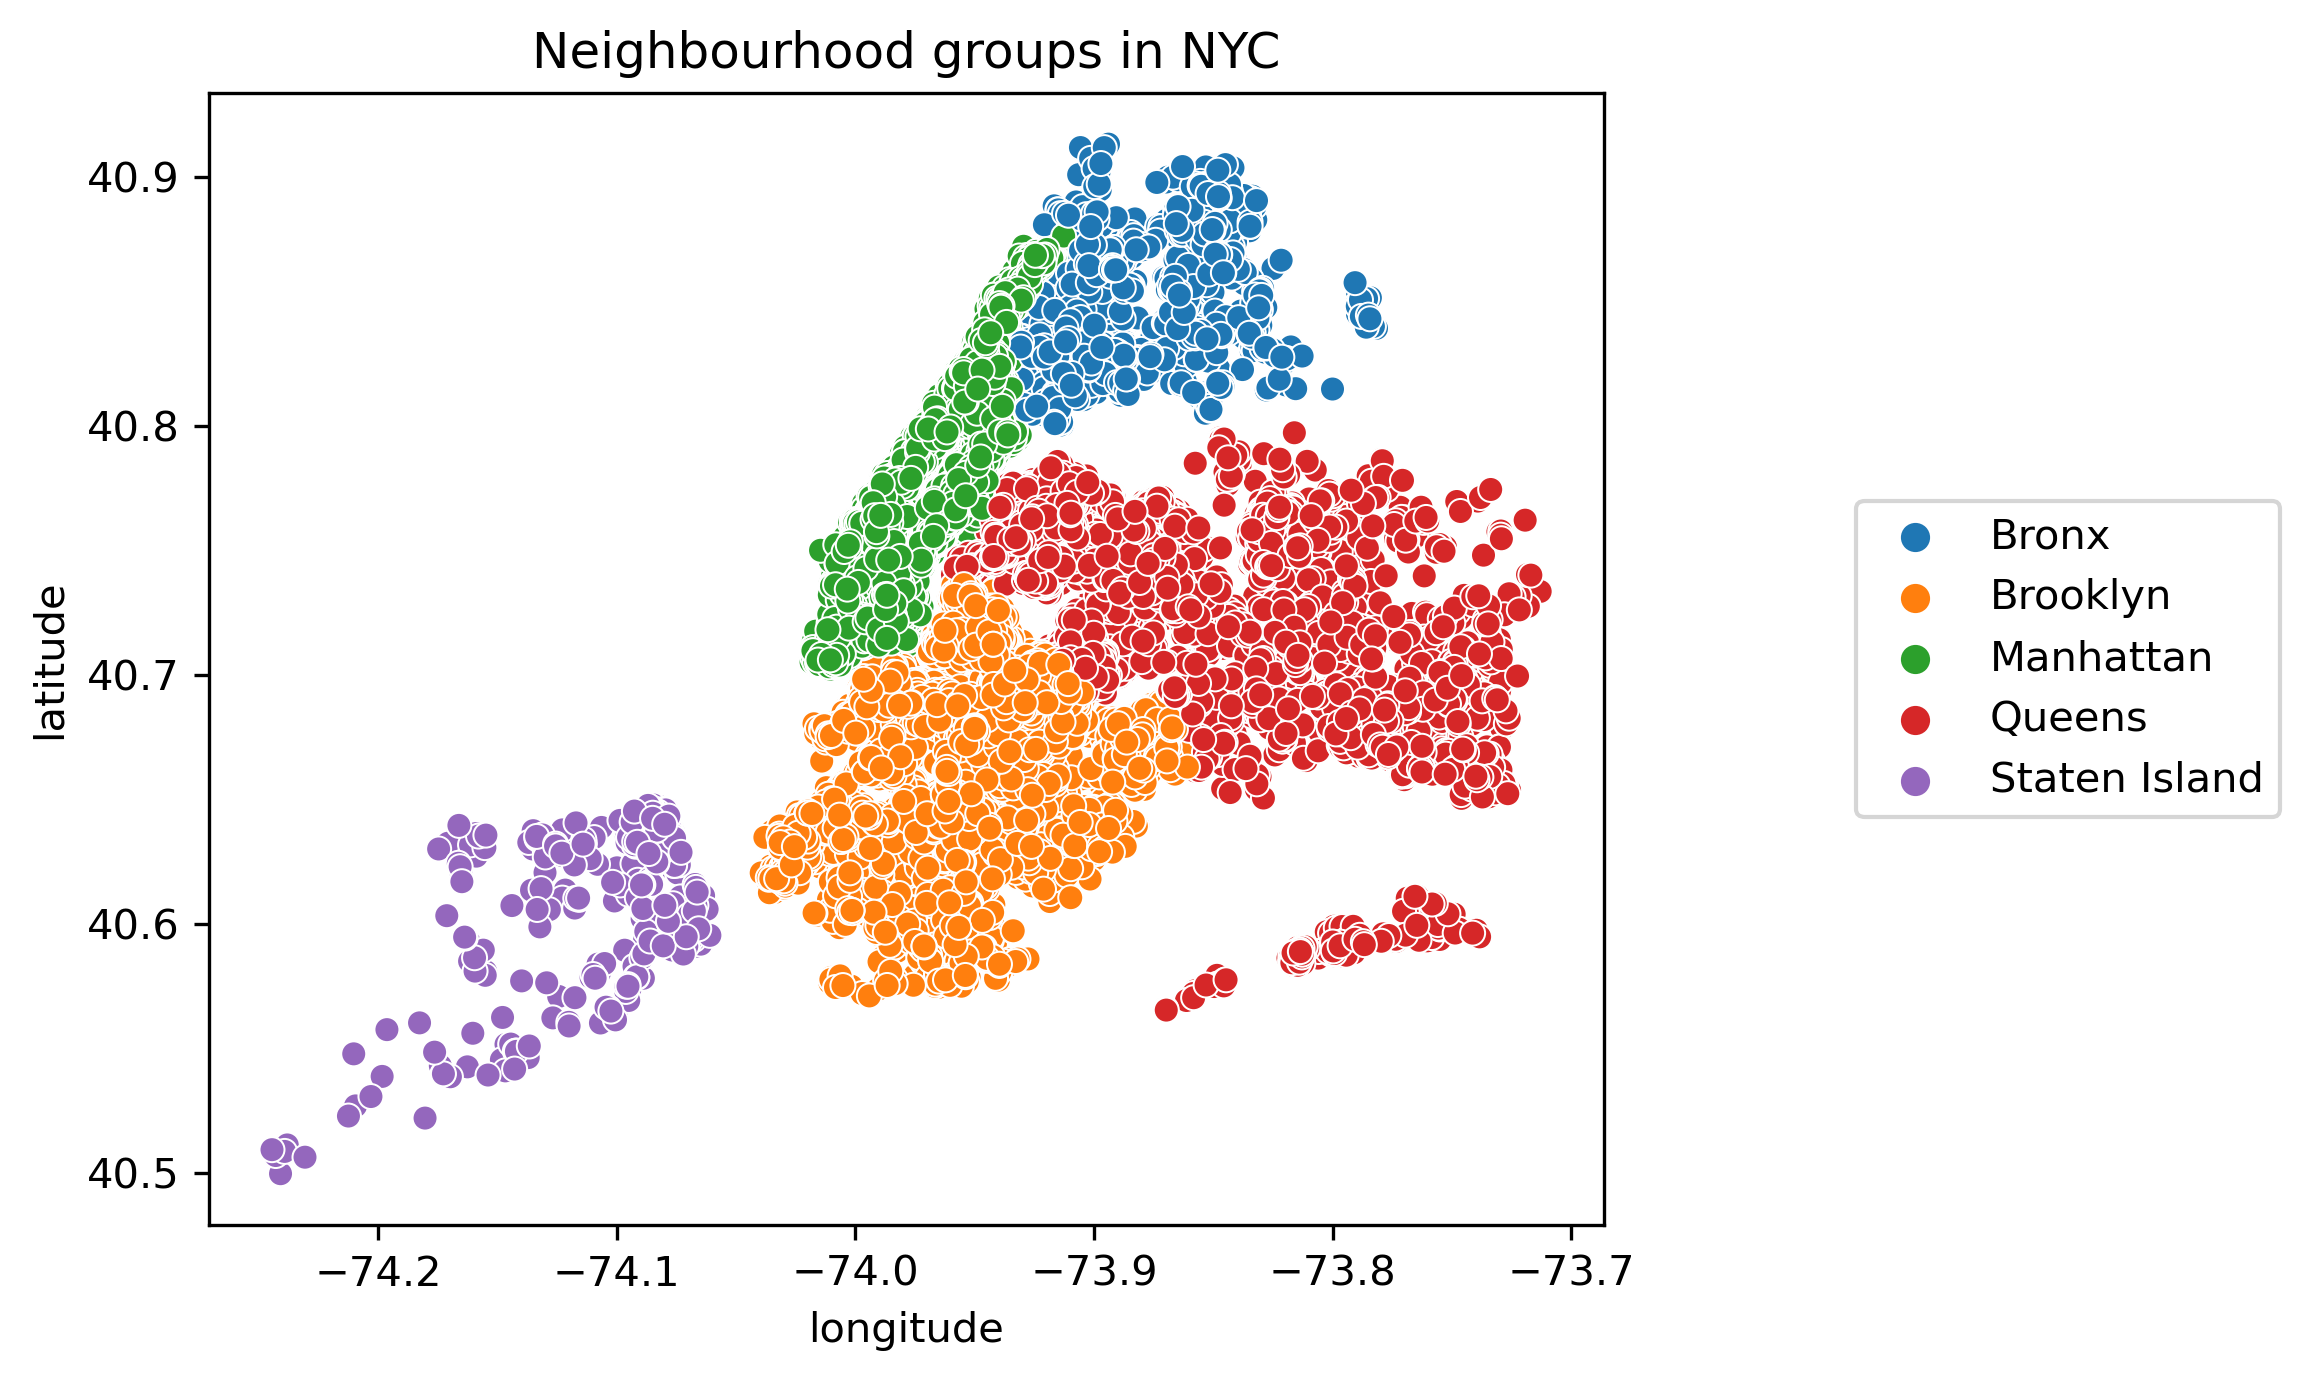

In [68]:
plt.figure(figsize=(6,5), dpi = 300)
ax3 = sns.scatterplot(data=nyc_dataCleaned, x="longitude", y= "latitude", hue = "neighbourhood_group")
ax3.set_title("Neighbourhood groups in NYC")
ax3.set_xlabel("longitude")
ax3.set_ylabel("latitude")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

#### Display the prices of the accommodations

In [70]:
# For a better readability: we set the price above median price to the median price
import statistics
median_price = statistics.median(nyc_dataCleaned['price'])
median_price

def f(row):
    if row["price"] > median_price:
        val = median_price
    else:
        val = row["price"]
    return val

nyc_dataCleaned['price_capped'] = nyc_data.apply(f, axis=1)

106

<Figure size 1800x1500 with 0 Axes>

Text(0.5, 1.0, 'Neighbourhood groups in NYC')

Text(0.5, 0, 'longitude')

Text(0, 0.5, 'latitude')

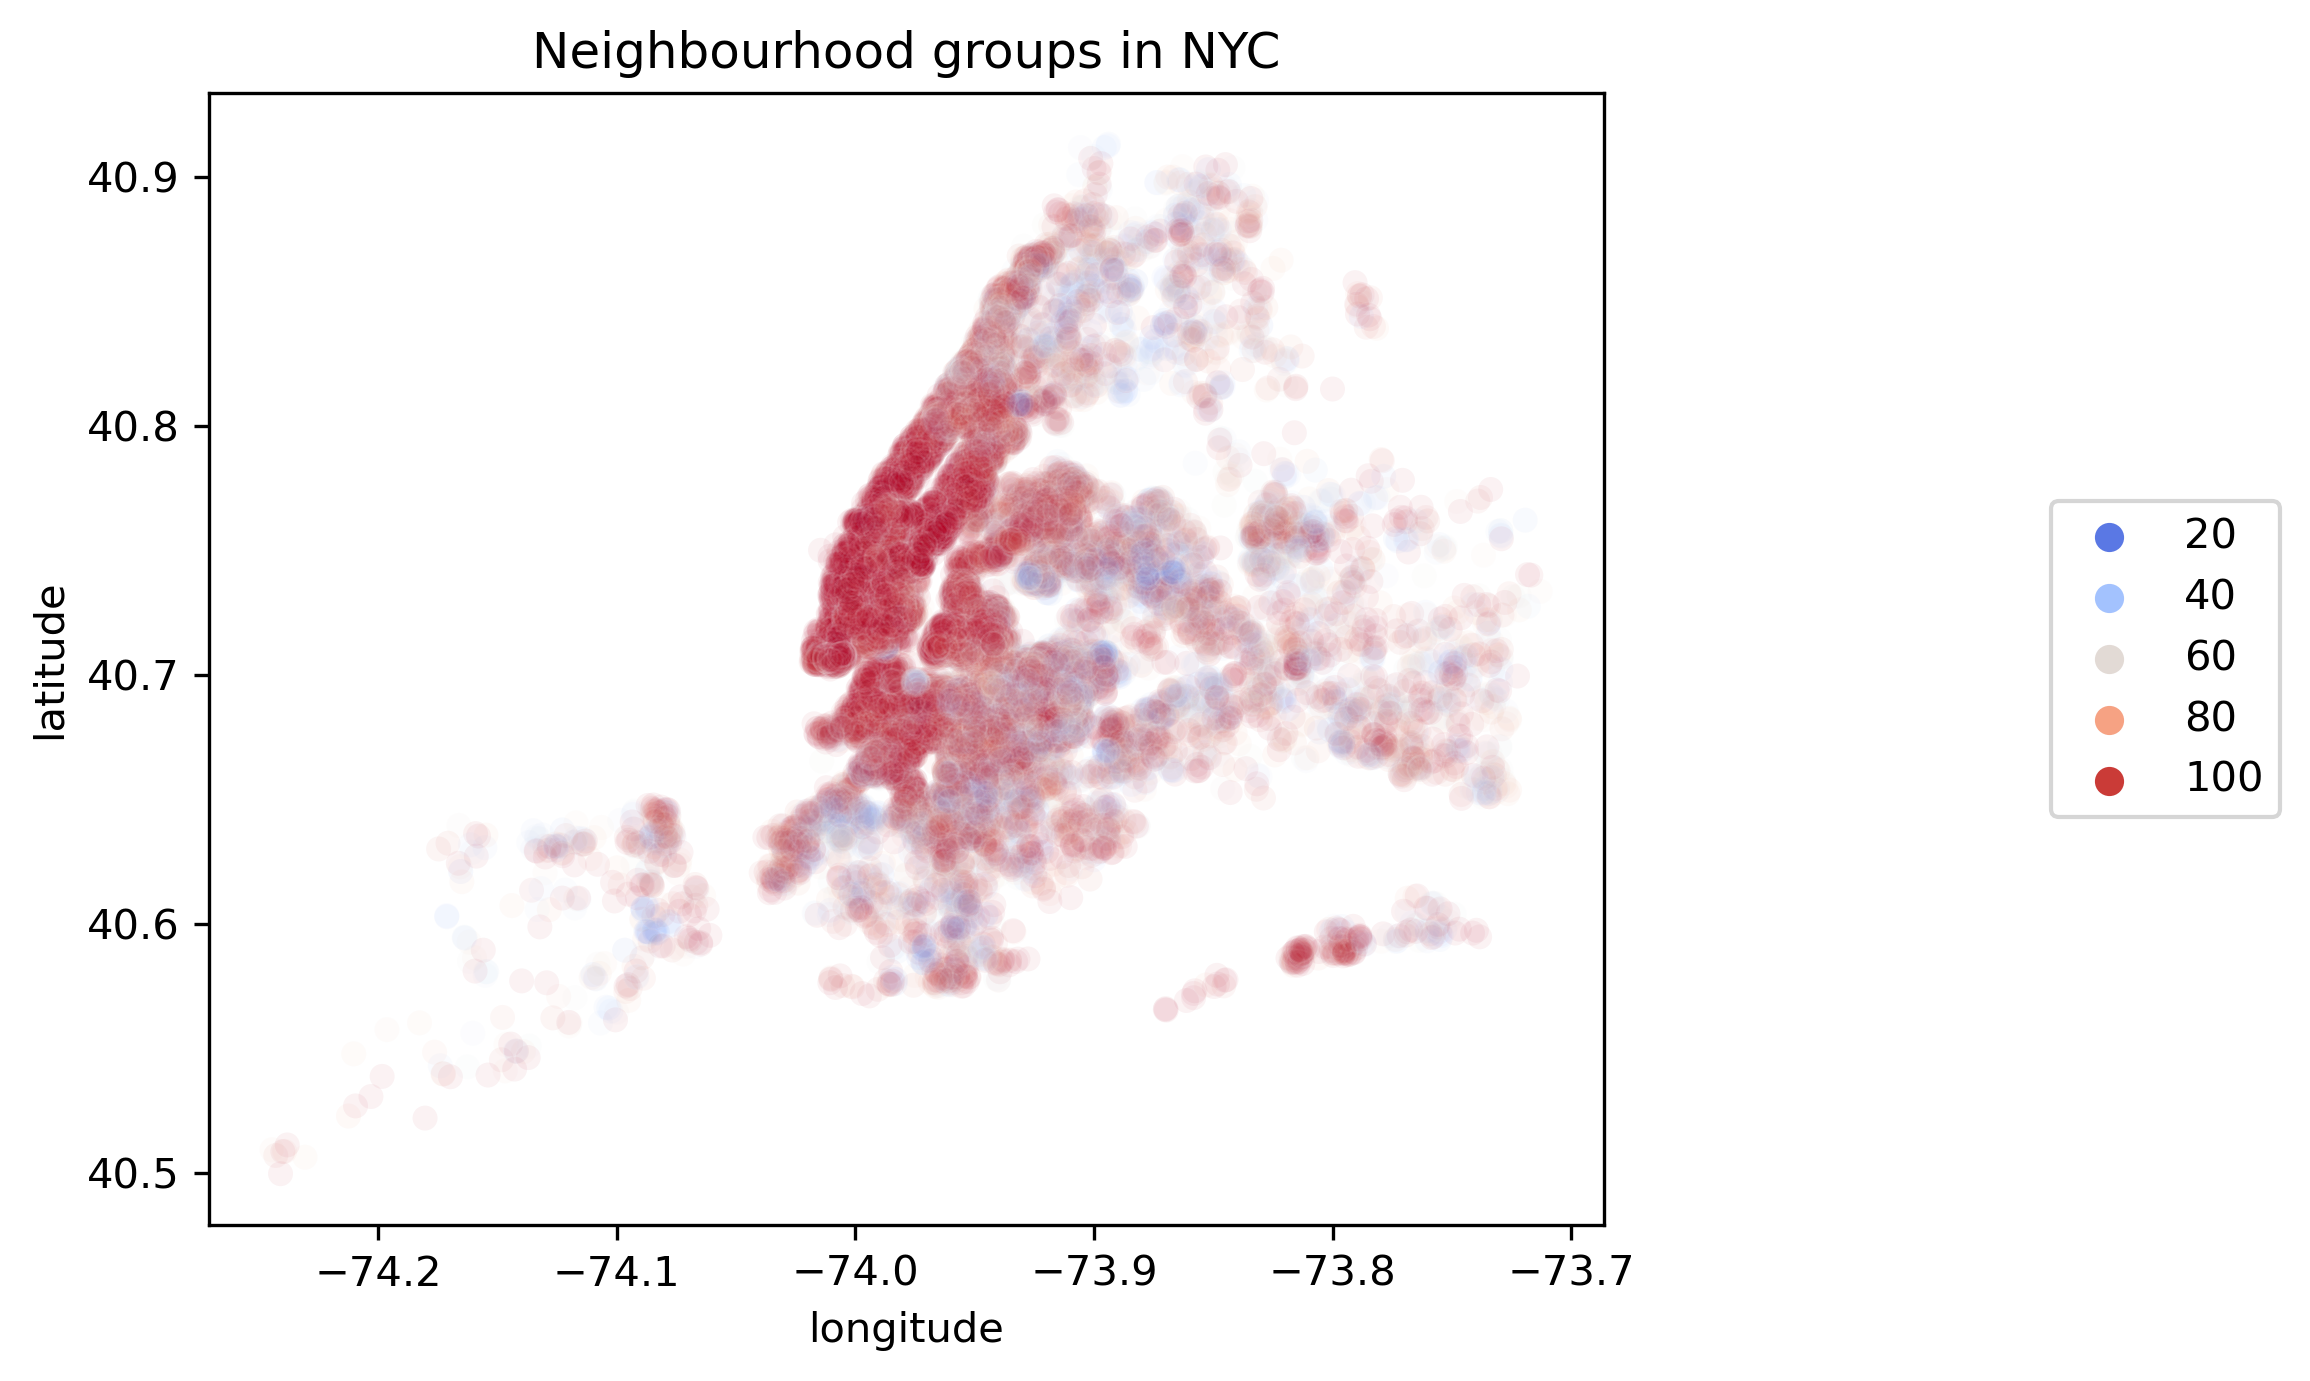

In [71]:
plt.figure(figsize=(6,5), dpi = 300)
ax4 = sns.scatterplot(data=nyc_dataCleaned, x="longitude", y= "latitude", hue = "price_capped", palette="coolwarm", alpha=0.05)
ax4.set_title("Neighbourhood groups in NYC")
ax4.set_xlabel("longitude")
ax4.set_ylabel("latitude")
plt.legend(loc='center right', bbox_to_anchor=(1.5, 0.5), ncol=1)

This also shows that Manhattan has the most accommodations with a price above the median (red dots)

## Hypothesis testing (t-test)

The exploratory data analysis suggests that Manhattan might be the most neighbourhood group with the highest prices. Let’s try to back this claim up with some statistics.

Mean, median and standard deviation of the price for each neighbourhood group

In [72]:
nyc_dataCleaned.groupby("neighbourhood_group").price.mean()

neighbourhood_group
Bronx             87.549632
Brooklyn         122.168236
Manhattan        191.407306
Queens            97.787745
Staten Island    101.680108
Name: price, dtype: float64

In [73]:
nyc_dataCleaned.groupby("neighbourhood_group").price.median()

neighbourhood_group
Bronx             65.0
Brooklyn          90.0
Manhattan        150.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64

In [74]:
nyc_dataCleaned.groupby("neighbourhood_group").price.std()

neighbourhood_group
Bronx            106.815075
Brooklyn         136.835601
Manhattan        209.639598
Queens           103.063813
Staten Island    113.055778
Name: price, dtype: float64

Manhattan has the highest mean and median price, however, the standard deviation is very high. The numbers indicate that Manhattan might be the neighbourhood group with the highest price.
We next test whether this happens at random or if there is a statistically significant difference in the prices.

Let’s analyze whether the prices for accomondatons in Manhattan are statistically higher than in the rest of New York City.

#### Preconditions for t-test

##### 1. Normal distribution
We can assume that the data is normally distributed, because of the large data set.

##### 2. Homogeneity of variance

Before we do the t-test, we need to check for homogeneity of variance, because this determines whether to use the t-test or the Welch-test.

Levene-Test for homogeneity of variance across groups
- H0 for Levene-Test: There is homogeneity of variance for both groups ("both groups have similar variance")
- H1 for Levene-Test: There is no homogeneity of variance for both groups ("both groups have different variance")

In [108]:

from scipy.stats import levene

manhattan = nyc_dataCleaned.loc[nyc_dataCleaned["neighbourhood_group"] == "Manhattan",:]
notManhattan = nyc_dataCleaned.loc[nyc_dataCleaned["neighbourhood_group"] != "Manhattan",:]

stat, p = levene(manhattan.price, notManhattan.price, center="median")
stat, p


(797.2205092652749, 5.472370211142615e-174)

We reject H0 because the the Levene-Test shows that there is no variance homogeneity: F(1,48821) = 797.22, p < 0.001. <br>
Therefore, we use the Welch test (t-test for variance inhomogeneity), instead of the normal t-test.

#### Create dataset for the independent t-test
Create dataset the independent t-test: One with accommodations from Manhattan and one data set with the rest

In [106]:
manhattan = nyc_dataCleaned.loc[nyc_dataCleaned["neighbourhood_group"] == "Manhattan",:]
notManhattan = nyc_dataCleaned.loc[nyc_dataCleaned["neighbourhood_group"] != "Manhattan",:]

#### T-test (for variance inhomogeneity)

H0: The price of accommodations in Manhattan equal to the price of accommodations in the rest of New York City <br>
H1: The price of accommodations in Manhattan greater than the price of accommodations in the rest of New York City

In [107]:
from scipy.stats import ttest_ind
ttest_ind(manhattan.price, notManhattan.price, equal_var=False, alternative = "greater")

Ttest_indResult(statistic=46.67635074535276, pvalue=0.0)

In [103]:
manhattan.price.mean()

191.4073063583815

In [104]:
notManhattan.price.mean()

115.4263126930431

We reject the Null Hypotheses (H0) and accept the alternative hypotheses (H1)<br>
<br>
Interpretation: <br>
This analysis shows that accommodations in Manhattan are statistically significantly more expensive (mean: 191.41) compared to accommodations in the rest of New York City (115.43).<br>
t=46.67, p < 0.001.

## Hypothesis testing (ANOVA)

Let’s further analyze whether there are differences in the Manhattan accomondatoins when also considering the room type of the accommodation.

In [86]:
# convert room_type to categorical to ensure that the graph is ordered alphabetically
nyc_dataCleaned['room_type'] = pd.Categorical(nyc_dataCleaned['room_type'], ["Private room", "Entire home/apt", "Shared room"])

# create new dataset containing only manhattan but all other attributes
manhattan_data = nyc_dataCleaned.loc[nyc_data["neighbourhood_group"]=="Manhattan",:]

<Figure size 900x450 with 0 Axes>

Text(0.5, 1.0, 'Distribution of price among different room types in Manhattan')

Text(0.5, 0, 'room type')

Text(0, 0.5, 'price')

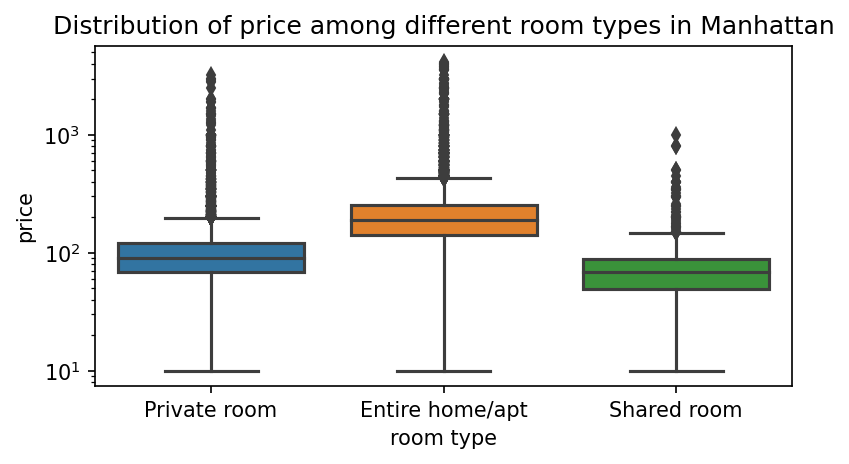

In [89]:
plt.figure(figsize=(6,3), dpi = 150)
ax2 = sns.boxplot(data=manhattan_data, x="room_type", y= "price", dodge=False)
ax2.set_yscale('log') # # We use the log of the price, because the range is too large. Otherwise, the boxplot is hard to read
ax2.set_title("Distribution of price among different room types in Manhattan")
ax2.set_xlabel("room type")
ax2.set_ylabel("price")

In [90]:
manhattan_data.groupby("room_type").price.mean()

room_type
Private room       114.765023
Entire home/apt    241.512221
Shared room         88.977083
Name: price, dtype: float64

In [91]:
manhattan_data.groupby("room_type").price.median()

room_type
Private room        90.0
Entire home/apt    190.0
Shared room         69.0
Name: price, dtype: float64

In [92]:
manhattan_data.groupby("room_type").price.std()

room_type
Private room       137.298033
Entire home/apt    232.337021
Shared room         92.416534
Name: price, dtype: float64

It seems like the type “entire home/apt” is the most expensive room type. But it is unclear whether the differences are actually significant. <br>
Let’s try to determine whether there are any statistically significant differences between the prices of the three room-types. We use a one-way ANOVA for this.

#### Preconditions for ANOVA

##### 1. Normal distribution
We can assume that the data is normally distributed, because of the large data set.

##### 2. Homogeneity of variance 
 Before we do the ANOVA, we need to check for homogeneity of variance, because it determines whether to use the ANOVA or Welch's F-Test.

Levene-Test for homogeneity of variance across groups
- H0 for Levene-Test: There is homogeneity of variance for all three groups 
- H1 for Levene-Test: There is no homogeneity of variance for all three groups 

In [112]:
manhatten_data_PrivateRoom = manhattan_data.loc[manhattan_data["room_type"]== "Private room",:]
manhatten_data_EntireHome = manhattan_data.loc[manhattan_data["room_type"]== "Entire home/apt",:]
manhatten_data_SharedRoom = manhattan_data.loc[manhattan_data["room_type"]== "Shared room",:]

In [114]:
from scipy.stats import levene
stat, p = levene(manhatten_data_PrivateRoom.price,manhatten_data_EntireHome.price, manhatten_data_SharedRoom.price, center="median")
stat, p

(222.21402387811895, 2.9655656306438667e-96)

We reject H0 because the the Levene-Test shows that there is no variance homogeneity: F = 222.21, p < 0.0. Therefore, we use the Welch’s F-Test.

#### Welch's F-Test

- H0: The mean price is equal for all three room types. <br>
- H1: There is a significant difference in the mean price for all three room types.

In [97]:
from statsmodels.stats.oneway import anova_oneway
anova_oneway(manhattan_data.price, manhattan_nyc_data.room_type, use_var = "unequal")

<class 'statsmodels.stats.base.HolderTuple'>
statistic = 1377.3030388174616
pvalue = 0.0
df = (2.0, 1456.616118372172)
df_num = 2.0
df_denom = 1456.616118372172
nobs_t = 21625.0
n_groups = 3
means = [241.51222104 114.76502321  88.97708333]
nobs = [13174.  7971.   480.]
vars_ = [53980.49127248 18850.74992327  8540.81575765]
use_var = unequal
welch_correction = True
tuple = (1377.3030388174616, 0.0)

There was a statistically significant difference between groups as determined by the Welch-F-Test (F = 1377.30, p < 0.001). <br>
We reject H0 and accept H1. <br>
<br>
Interpretation: <br>
We can see that the significance value is below 0.05 and, therefore, there is a statistically significant difference in the mean price per night between the different room types. <br>
This is great to know, but we do not know which of the specific room types differed. We can find this out with a TukeyHSD post hoc test.

#### ANOVA TukeyHSD Post Hoc test

In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=manhattan_data["price"], groups=manhattan_data["room_type"], alpha = 0.01)
print(tukey)

          Multiple Comparison of Means - Tukey HSD, FWER=0.01           
     group1        group2     meandiff p-adj    lower     upper   reject
------------------------------------------------------------------------
Entire home/apt Private room -126.7472  0.001 -135.0195 -118.4749   True
Entire home/apt  Shared room -152.5351  0.001 -179.6239 -125.4464   True
   Private room  Shared room  -25.7879 0.0168  -53.1857    1.6098  False
------------------------------------------------------------------------


The TukeyHSD post hoc test reveals that the price for “entire home/apt” is statistically significantly higher than for private (p < 0.001) and shared room (p < 0.001).<br>
There is no statistically significant difference between the shared and private room (p = 0.0168).

## Conclusion:
Manhattan has significantly higher prices than the rest of NYC. Renting an entire home/apartment in Manhattan is significantly more expensive than renting a private room or shared room. <br>
However, there is no significant difference in the price for the shared or private room.
